# Rendu Projet Annuel 2019 - 2020

## Intervenant : Nicolas VIDAL


## Auteurs: 
- Natane BENDAVID
- Louis TARDY
- Cheikh Abdourahmane WADE


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *

#### Importation de librairie Rust

In [2]:
my_dll_path = "C:/Users/MOI/dev/PA-MachineLearning-3ESGI/Project/Lib/MachineLearning/target/debug/machine_learning_c.dll"

my_lib = CDLL(my_dll_path)

#### Paramétrage de la librairie

In [3]:
# Création d'un model
my_lib.create_linear_model.restype = c_void_p
my_lib.create_linear_model.argtypes = [c_int]
# Prédiction d'un model pour la classification
my_lib.predict_linear_classification.argtypes = [
    c_void_p,
    POINTER(c_double),
    c_int
]
my_lib.predict_linear_classification.restype = c_double
# Entrainement du model pour la classification
my_lib.train_linear_model_classification_python.argtypes = [
    c_void_p,
    POINTER(c_double),
    POINTER(c_double),
    c_int,
    c_int,
    c_int,
    c_double
]
my_lib.train_linear_model_classification_python.restype = None

# Cas de tests

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
# Data
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype='float64')
Y = np.array([
      1,
      -1,
      -1
], dtype='float64')
flattened_X = X.flatten()

#### Simple linear model :

After Training
1.0
-1.0
-1.0
Test model Training


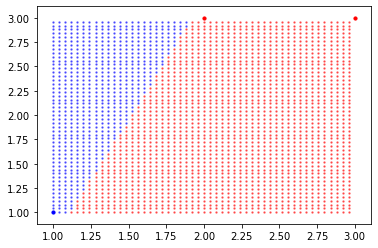

<Figure size 432x288 with 0 Axes>

In [5]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    1000,
    0.01
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(X[0, 0], X[0, 1], color='blue', s=10)
plt.scatter(X[1:3, 0], X[1:3, 1], color='red', s=10)
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [6]:
X = np.concatenate([
    np.random.random((50,2)) * 0.9 + np.array([1, 1]),
    np.random.random((50,2)) * 0.9 + np.array([2, 2])],
    axis = 0)
Y = np.concatenate([np.ones((50, 2)), np.ones((50, 2)) * -1.0])
flattened_X = X.flatten()

#### Simple linear model :

After Training
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Test model Training


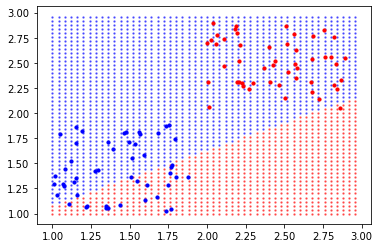

<Figure size 432x288 with 0 Axes>

In [7]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    100000,
    0.00000000001
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', s=10)
plt.scatter(X[50:100,0], X[50:100,1], color='red', s=10)
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [8]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]], dtype='float64')
Y = np.array([1, 1, -1, -1], dtype='float64')

flattened_X = X.flatten()

#### Simple linear model :

After Training
-1.0
1.0
1.0
1.0
Test model Training


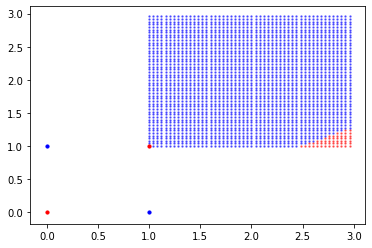

<Figure size 432x288 with 0 Axes>

In [9]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    100000,
    0.000001
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', s=10)
plt.scatter(X[2:4,0], X[2:4,1], color='red', s=10)
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [10]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

flattened_X = X.flatten()

#### Simple linear model :

After Training
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


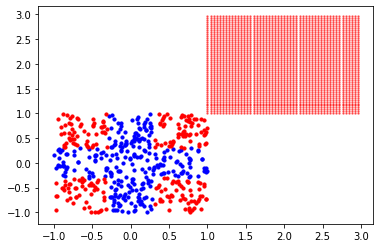

<Figure size 432x288 with 0 Axes>

In [11]:
#Création du model
model = my_lib.create_linear_model(c_int(X.shape[1]))

#Entrainement du model
my_lib.train_linear_model_classification_python(
    model,
    flattened_X.ctypes.data_as(POINTER(c_double)),
    Y.ctypes.data_as(POINTER(c_double)),
    X.shape[0],
    X.shape[1],
    100000,
    0.001
)

#Prediction du model
print("After Training")
for inputs_k in X:
    print(my_lib.predict_linear_classification(model, inputs_k.ctypes.data_as(POINTER(c_double)), len(inputs_k)))


#Test du model
print("Test model Training")
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0

test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib.predict_linear_classification(
                model,
                test_input_k.ctypes.data_as(POINTER(c_double)),
                len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)

red_points = np.array(red_points)
blue_points = np.array(blue_points)

if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)

plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue', s=10)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red', s=10)
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [12]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])


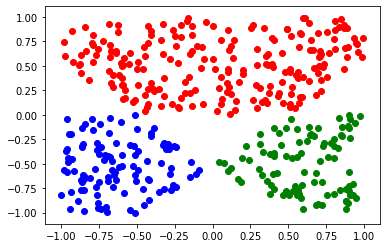

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [14]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])


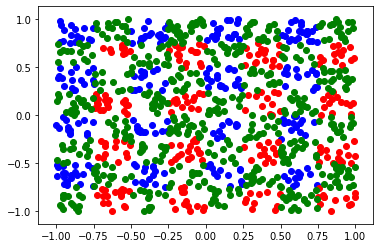

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [22]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

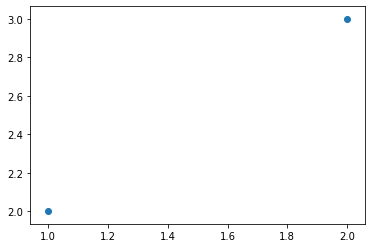

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [24]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

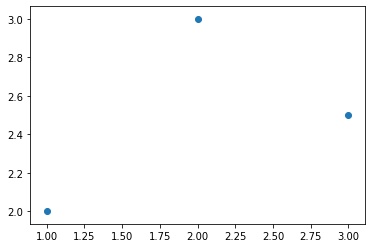

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [26]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

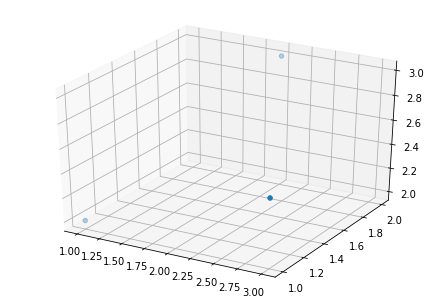

<Figure size 432x288 with 0 Axes>

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [28]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

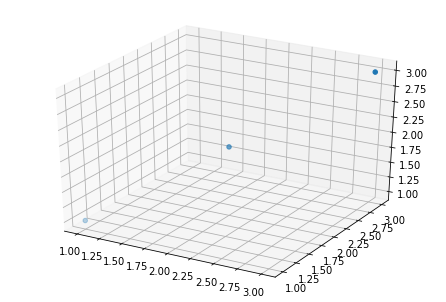

<Figure size 432x288 with 0 Axes>

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [30]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

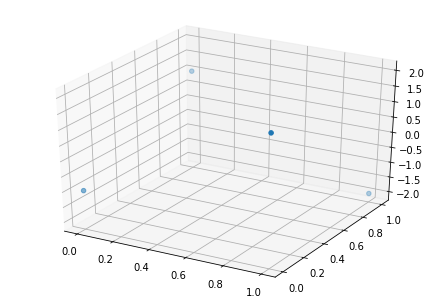

<Figure size 432x288 with 0 Axes>

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()